# Visualization for Zip Files

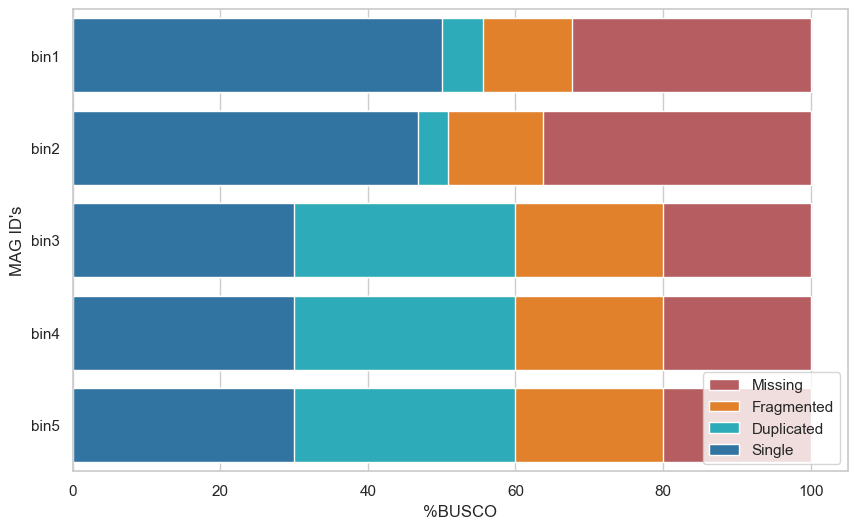

In [1]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import altair as alt

# Example data (same as in your code)
data = {
    'Input file': ['bin1.fasta', 'bin2.fasta', 'bin3.fasta', 'bin4.fasta', 'bin5.fasta'],
    'Dataset': ['bacteria_odb10', 'bacteria_odb10','bacteria_odb10', 'bacteria_odb10','bacteria_odb10'],
    'Complete': [55.6, 50.8, 60, 60, 60],
    'Single': [50.0, 46.8, 30, 30, 30],
    'Duplicated': [5.6, 4.0, 30, 30, 30],
    'Fragmented': [12.1, 12.9, 20, 20, 20],
    'Missing': [32.3, 36.3, 20, 20, 20],
    'n_markers': [124, 124, 124, 124, 132],
    'Scaffold N50': [5383, 5627, 123, 123, 123],
    'Contigs N50': [5383, 5627, 123, 123, 123],
    'Percent gaps': ['0.000%', '0.000%', '0.000%', '0.000%', '0.000%'],
    'Number of scaffolds': [594, 537, 123, 123, 123]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Clean column names
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)
df.columns = df.columns.str.lower()
df["mag_id"] = df["input_file"].str.split('.', expand=True)[0]

# Make new columns for plotting
df["single_"] = df["single"]
df["duplicated_"] = df["single_"] + df["duplicated"]
df["fragmented_"] = df["duplicated_"] + df["fragmented"]
df["missing_"] = df["fragmented_"] + df['missing']

# Set the style
sns.set(style="whitegrid")
sns.set_palette("colorblind")

# Create a horizontal stacked barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=df, y='mag_id', x='missing_', color='r', label='Missing')
sns.barplot(data=df, y='mag_id', x='fragmented_', color='tab:orange', label='Fragmented')
sns.barplot(data=df, y='mag_id', x='duplicated_', color='tab:cyan', label='Duplicated')
sns.barplot(data=df, y='mag_id', x='single_', color='tab:blue', label='Single')

# Customize the plot
plt.xlabel('%BUSCO')
plt.ylabel("MAG ID's")
plt.legend(loc="lower right")

# Show the plot
plt.show()


# Visualization for HTMLs

## Toy Data

In [3]:
# Make more data from the same
n_samples = 3
dfs = []

for i in range(3):
    df_i = df.copy()
    df_i["sample_id"] = f"sample_{i}"
    dfs.append(df_i)

df2 = pd.concat(dfs)

# Pivot long
df2 = pd.melt(df2, id_vars=["sample_id", "mag_id"], value_vars=["single", "duplicated","fragmented","missing"], value_name="BUSCO_percentage", var_name="category")

# Specify order
mapping = {"single":1, "duplicated":2,"fragmented":3,"missing":4}
df2["order"] = df2["category"].map(mapping)

In [61]:
# Plot
domain = ['single', 'duplicated', 'fragmented', 'missing']
range_ = ['#1E90FF', '#87CEFA', '#FFA500', '#FF7F50']

output_plot = alt.Chart(df2).mark_bar().encode(
    x=alt.X('sum(BUSCO_percentage)', stack="normalize", title="BUSCO fracc."),
    y=alt.Y('mag_id', axis=alt.Axis(title='MAG ID')),
    #color=alt.Color('category').scale(domain=domain, range=range_),
    color=alt.Color('category', scale=alt.Scale(domain=domain, range=range_), legend=alt.Legend(title="BUSCO Category")),
    order=alt.Order(
      # Sort the segments of the bars by this field
      'order',
      sort='ascending'),
    row=alt.Row("sample_id", title='Sample ID', align="all"))

output_plot = output_plot.configure_axis(labelFontSize=17, titleFontSize=20)
output_plot = output_plot.configure_legend(labelFontSize=17, titleFontSize=20)
output_plot = output_plot.configure_header(labelFontSize=17, titleFontSize=20)
output_plot = output_plot.properties(width=800, height=200)
output_plot 

alt.Chart(...)

## Real Data

In [ ]:
# Read in data
df = pd.read_csv("/Users/santiago/Downloads/all_batch_summeries (2).csv", usecols=range(1,14))

# Clean column names
df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.replace('[^a-zA-Z0-9_]', '', regex=True)
df.columns = df.columns.str.lower()

# Make field for mag id
df["mag_id"] = df["input_file"].str.split('.', expand=True)[0]

# Pivot long
df2 = pd.melt(df, id_vars=["sample_id", "mag_id", "dataset", "n_markers"], value_vars=["single", "duplicated","fragmented","missing"], value_name="BUSCO_percentage", var_name="category")

# Specify order
mapping = {"single":1, "duplicated":2,"fragmented":3,"missing":4}
df2["order"] = df2["category"].map(mapping)
df2["fracc_markers"] = "~" + round(df2["BUSCO_percentage"] * df2["n_markers"] / 100).map(int).map(str) + "/124"
df2

In [126]:
# Plot
domain = ['single', 'duplicated', 'fragmented', 'missing']
range_ = ['#1E90FF', '#87CEFA', '#FFA500', '#FF7F50']

output_plot = alt.Chart(df2).mark_bar().encode(
    x=alt.X('sum(BUSCO_percentage)', stack="normalize", title="BUSCO fracc."),
    y=alt.Y('mag_id', axis=alt.Axis(title='MAG ID')),
    color=alt.Color('category', scale=alt.Scale(domain=domain, range=range_), legend=alt.Legend(title="BUSCO Category")),
    order=alt.Order('order', sort='ascending'),
    tooltip=[alt.Tooltip("sample_id", title="Sample ID"),
             alt.Tooltip("mag_id", title="MAG ID"),
             alt.Tooltip("dataset", title="Lineage dataset"),
             alt.Tooltip("fracc_markers", title="Aprox. number of markers in this category"),
             alt.Tooltip("BUSCO_percentage", title="Percentage [%]"),],
    opacity=alt.value(0.85)).properties(width=600, height=18*9).facet(row=alt.Row("sample_id", title='Sample ID')).resolve_scale(y="independent")

output_plot = output_plot.configure_axis(labelFontSize=17, titleFontSize=20)
output_plot = output_plot.configure_legend(labelFontSize=17, titleFontSize=20)
output_plot = output_plot.configure_header(labelFontSize=17, titleFontSize=20)
output_plot 

alt.FacetChart(...)